In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Python/archive'):#directory name
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('c:/Users/ellen/OneDrive/Documents/Python/archive/WELFake_Dataset.csv') #assigned the csv file to be df
df.head()#reads only the raw data of df(the csv file), it returns first 5 rows default value is 5

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
df.describe().T # Generates descriptive statistics of the DataFrame, such as count, mean, std (standard deviation), min, and max for each column.
#'.T' is used to transpose the result, swapping rows and columns. So, instead of having statistics for each column, you'll have them for each row, which is often more readable.

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,72134.0,36066.500000,20823.436496,0.0,18033.25,36066.5,54099.75,72133.0
label,72134.0,0.514404,0.499796,0.0,0.00,1.0,1.00,1.0


In [5]:
df.isnull().sum()#check for missing or null values followed by .sum() to count the number of null values in each column.

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [6]:
df = df.fillna(' ')#replace missin gor null values into an empty string

In [7]:
df.isnull().sum()#check again for null values and count the number of null values in each column

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [8]:
df.label.value_counts()
#"df" is our dataFrame
# "label" is a column on our dataframe
# .value_counts() counts the occurrences of unique values in the specified column.

label
1    37106
0    35028
Name: count, dtype: int64

In [9]:
df.label.mean()#counts the mean of the column label

0.5144037485790335

In [10]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)


In [11]:
df["content"] = df["title"] + df["text"]
df["length"] = df["content"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,content,length
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668


In [12]:
df[['length', 'label']].value_counts()

length  label
73      1        34
2001    1        30
1793    1        28
471     0        28
1726    1        27
                 ..
3998    1         1
6923    1         1
6924    0         1
6925    0         1
122556  1         1
Name: count, Length: 14853, dtype: int64

In [13]:
df1 = df[df['length'] < df['length'].quantile(0.80)]

<Axes: xlabel='length', ylabel='Density'>

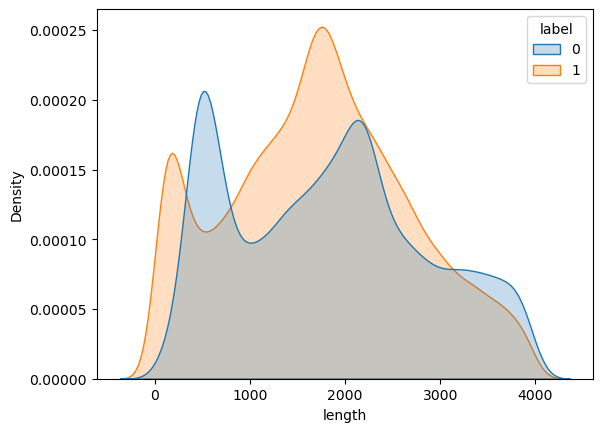

In [14]:
sns.kdeplot(data  = df1, x= 'length', hue = 'label', fill = True)

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
dfFalse = df[df['label'] == 1]
dfFalse

,title,text,label,content,length
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342
...,...,...,...,...,...
72125,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,63
72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,1114
72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,4493
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...,3092


In [17]:
X = df[['title', 'text', 'content']]

In [18]:
X_train, X_test,Y_train, Y_test = train_test_split(X, df['label'], test_size = 0.15, random_state = 42)

In [19]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train['content'])
count_test = count_vectorizer.transform(X_test['content'])

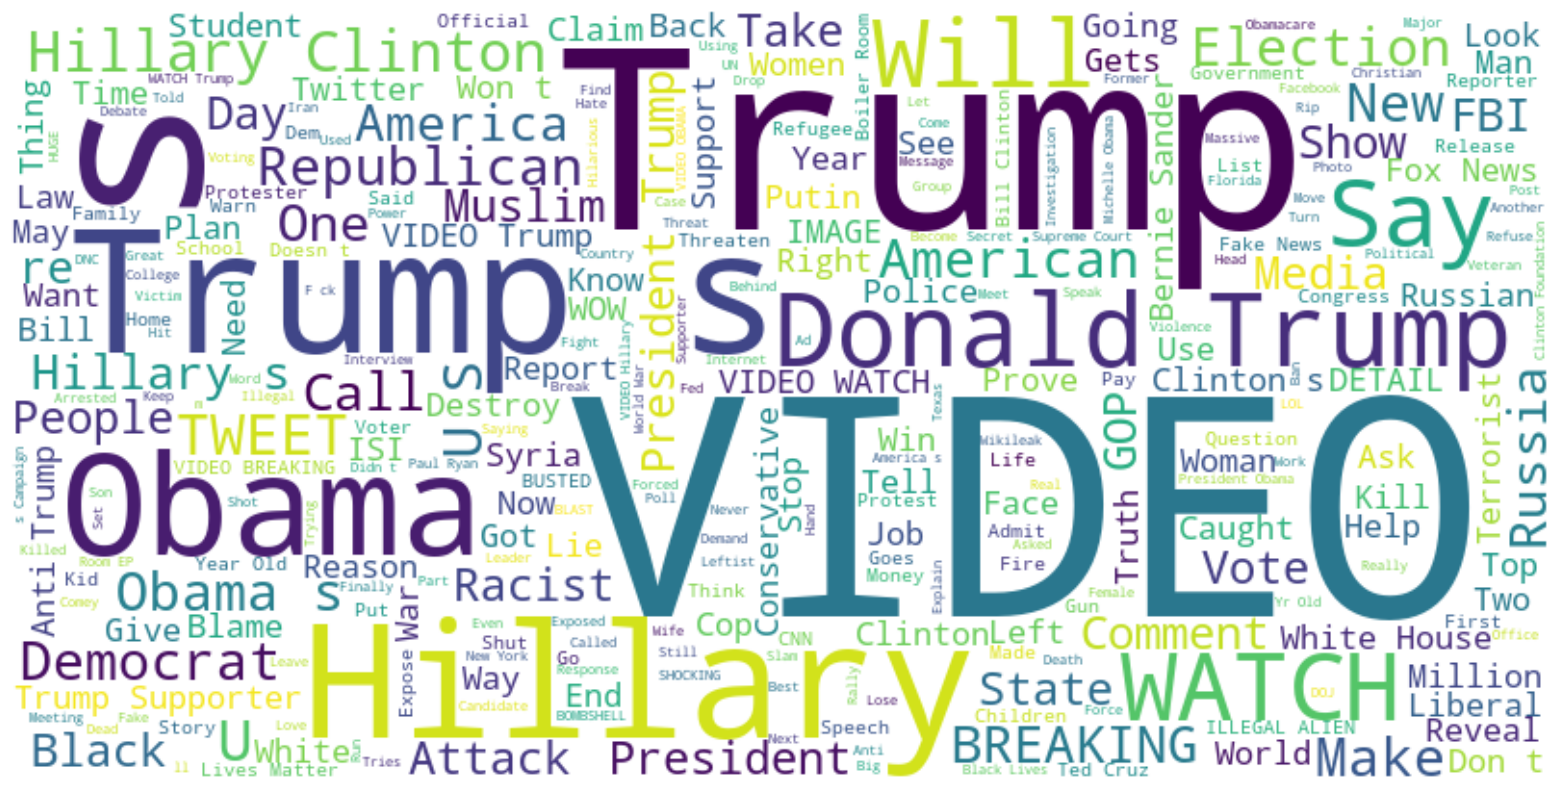

In [20]:
FalseCon = ' '.join(con for con in dfFalse['title'])# 0 true, 1 false
wordcloud = WordCloud(background_color='white', 
    max_words=300,
    width=800, 
    height=400,).generate(FalseCon)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
dfTrue = df[df['label'] == 0]
dfTrue

,title,text,label,content,length
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
11,"May Brexit offer would hurt, cost EU citizens ...",BRUSSELS (Reuters) - British Prime Minister Th...,0,"May Brexit offer would hurt, cost EU citizens ...",1955
12,Schumer calls on Trump to appoint official to ...,"WASHINGTON (Reuters) - Charles Schumer, the to...",0,Schumer calls on Trump to appoint official to ...,2268
14,No Change Expected for ESPN Political Agenda D...,As more and more sports fans turn off ESPN to ...,0,No Change Expected for ESPN Political Agenda D...,2616
15,Billionaire Odebrecht in Brazil scandal releas...,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,0,Billionaire Odebrecht in Brazil scandal releas...,1451
...,...,...,...,...,...
72124,An Unlikely Contender Rises in France as the A...,"PARIS — In the age of Donald J. Trump, “Bre...",0,An Unlikely Contender Rises in France as the A...,5995
72126,Determined to kill: Can tough gun laws end mas...,The flag at Desert Hot Springs' Condor Gun Sho...,0,Determined to kill: Can tough gun laws end mas...,10958
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....,4098
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...,2447


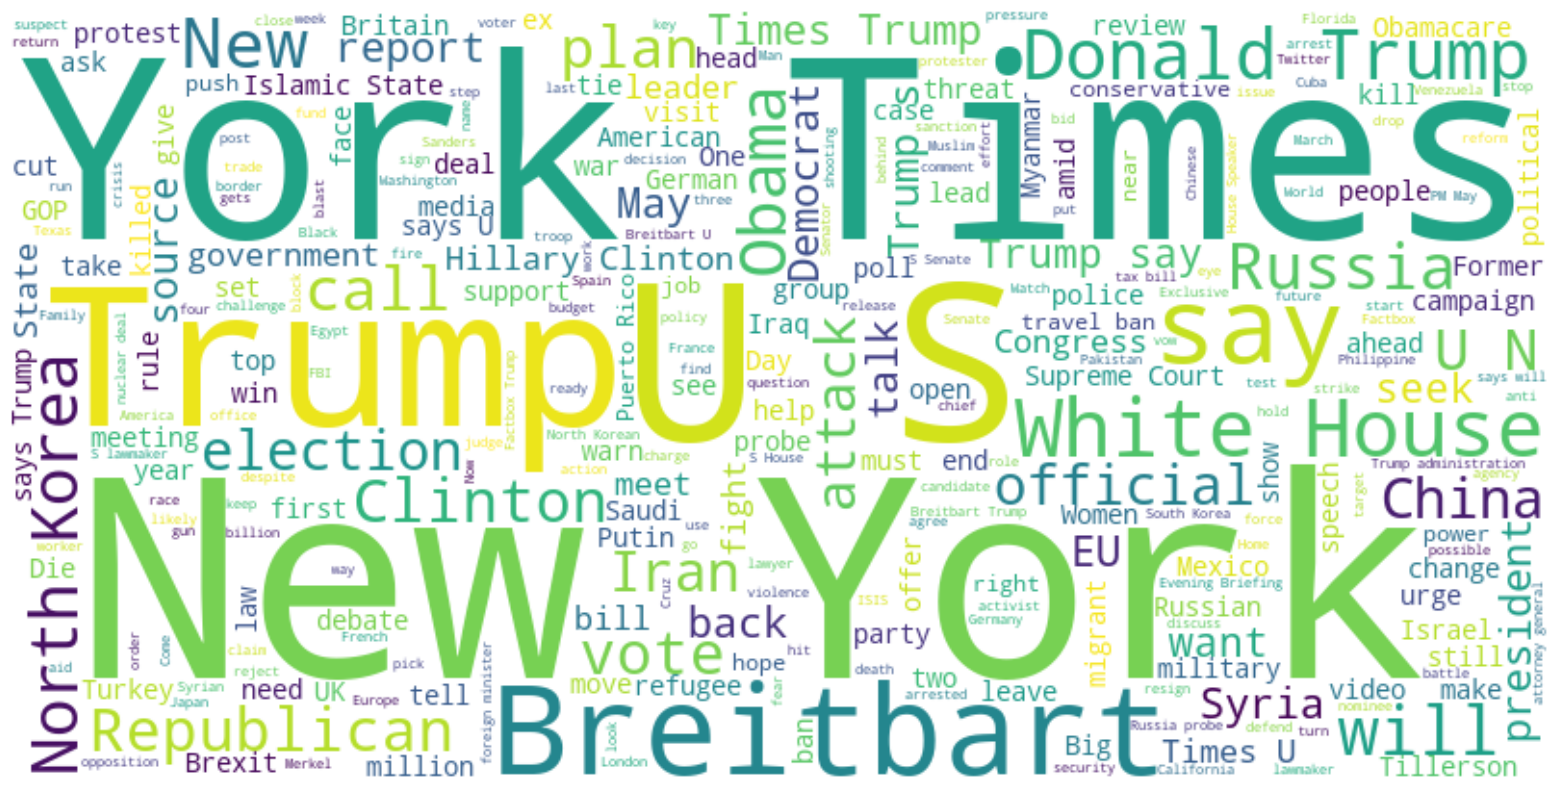

In [22]:
TrueCon = ' '.join(con for con in dfTrue['title'])
wordcloud = WordCloud(background_color='white', 
    max_words=300,
    width=800, 
    height=400,).generate(TrueCon)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
df.columns

Index(['title', 'text', 'label', 'content', 'length'], dtype='object')

In [24]:
X

,title,text,content
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",SATAN 2: Russia unvelis an image of its terrif...
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,Russians steal research on Trump in hack of U....
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",WATCH: Giuliani Demands That Democrats Apolog...
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,Trump tussle gives unpopular Mexican leader mu...


In [25]:
print(len(X_train),len(X_test),len(Y_train), len(Y_test))

61313 10821 61313 10821


In [26]:
Y_train.describe()

count    61313.000000
mean         0.516139
std          0.499744
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [27]:
X_train

,title,text,content
50045,Twitter EXPLODES As Tortured Snowflake Trump ...,Donald Trump regularly takes a beating on Twit...,Twitter EXPLODES As Tortured Snowflake Trump ...
12035,THE VIDEO LIBERALS Don’t Want You To See: LIL ...,"Lil Wayne, whose real name is Dwayne Michael C...",THE VIDEO LIBERALS Don’t Want You To See: LIL ...
45496,Hillary Clinton Appears Disoriented And Confus...,Hillary Clinton Appears Disoriented And Conf...,Hillary Clinton Appears Disoriented And Confus...
13279,Indo-Pacific? Not from where China is sitting...,BEIJING/NEW DELHI (Reuters) - As U.S. Presiden...,Indo-Pacific? Not from where China is sitting....
25401,Trump to call Mexico's Pena Nieto in earthquak...,WASHINGTON (Reuters) - U.S. President Donald T...,Trump to call Mexico's Pena Nieto in earthquak...
...,...,...,...
37194,I’m Running Out of Popcorn – Harvey Organ,Let us have a look at the data for today \n. \...,I’m Running Out of Popcorn – Harvey OrganLet u...
6265,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...
54886,Vanguard CEO 'encouraged' by efforts to revise...,(Reuters) - Vanguard Group Chief Executive Bil...,Vanguard CEO 'encouraged' by efforts to revise...
860,High School Forced to Change Mascot over Accus...,A school district in Kentucky has canceled the...,High School Forced to Change Mascot over Accus...


In [28]:
model = RandomForestClassifier(n_estimators=100)
model.fit(count_train, Y_train)

RandomForestClassifier()

In [29]:
#import model
from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.metrics import classification_report, accuracy_score

In [30]:
pred = model.predict(count_test)

# Evaluate the model
print(classification_report(Y_test, pred))
accuracy = accuracy_score(Y_test, pred)
print("Accuracy:", round(accuracy * 100), '%')
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5361
           1       0.94      0.95      0.94      5460

    accuracy                           0.94     10821
   macro avg       0.94      0.94      0.94     10821
weighted avg       0.94      0.94      0.94     10821

Accuracy: 94 %
Accuracy: 0.9437205433878569


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

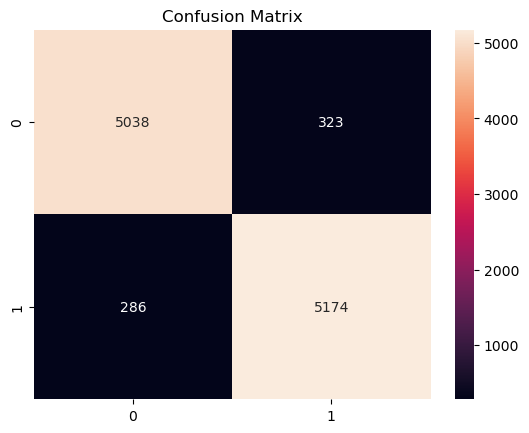

In [32]:
cm = confusion_matrix(Y_test, pred)
sns.heatmap(cm, annot = True, fmt = '')
plt.title('Confusion Matrix')
plt.show()